In [446]:
import pandas as pd
import numpy as np

In [447]:
# 데이터셋 불러오기

# subway데이터셋: 서울시 30분 단위 이용 통계(20~22년)
subway20 = pd.read_csv("data/subway20_df.csv")
subway21 = pd.read_csv("data/subway21_df.csv")
subway22 = pd.read_csv("data/subway22_df.csv")

# EXC데이터셋: 우수중소기업 공간데이터
EXC =  pd.read_csv("data/EXC_df.csv")

# TBVIATR데이터셋: 서울시 주요시설, 집객시설 주요데이터(20년)
TBVIATR = pd.read_csv("data/TBVIATR_df.csv")

# Seoul데이터셋: 서울시 지하철 시간대별 승객수(16~19년)
# SEOUL17 = pd.read_csv("data/SEOUL17_df.csv")
# SEOUL18 = pd.read_csv("data/SEOUL18_df.csv")
# SEOUL19 = pd.read_csv("data/SEOUL19_df.csv")

# STATN데이터셋: 수도권 지하철 공간데이터(19년)
STATN19 = pd.read_csv("data/STATN19_df.csv")

# 1. 시각화

In [448]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## subway데이터셋: 서울시 30분 단위 이용 통계(20년)

### 호선별 승하차 총 인원 수

In [449]:
subway21['GET_TOTAL'] = subway21['GETON_CNT'] + subway21['GETOFF_CNT']

In [450]:
subway21_total = subway21[['LINE_NM','GET_TOTAL']].groupby('LINE_NM', as_index = False).sum().sort_values('GET_TOTAL')
subway21_total

,LINE_NM,GET_TOTAL
10,우이신설선,23084704
9,9호선2~3단계,43636427
0,1호선,69914047
7,8호선,86694515
8,9호선,122718068
5,6호선,154927011
3,4호선,223497636
2,3호선,234372532
4,5호선,309580895
6,7호선,318074271


Text(0.5, 1.0, '21년 호선별 승하차인원 합계')

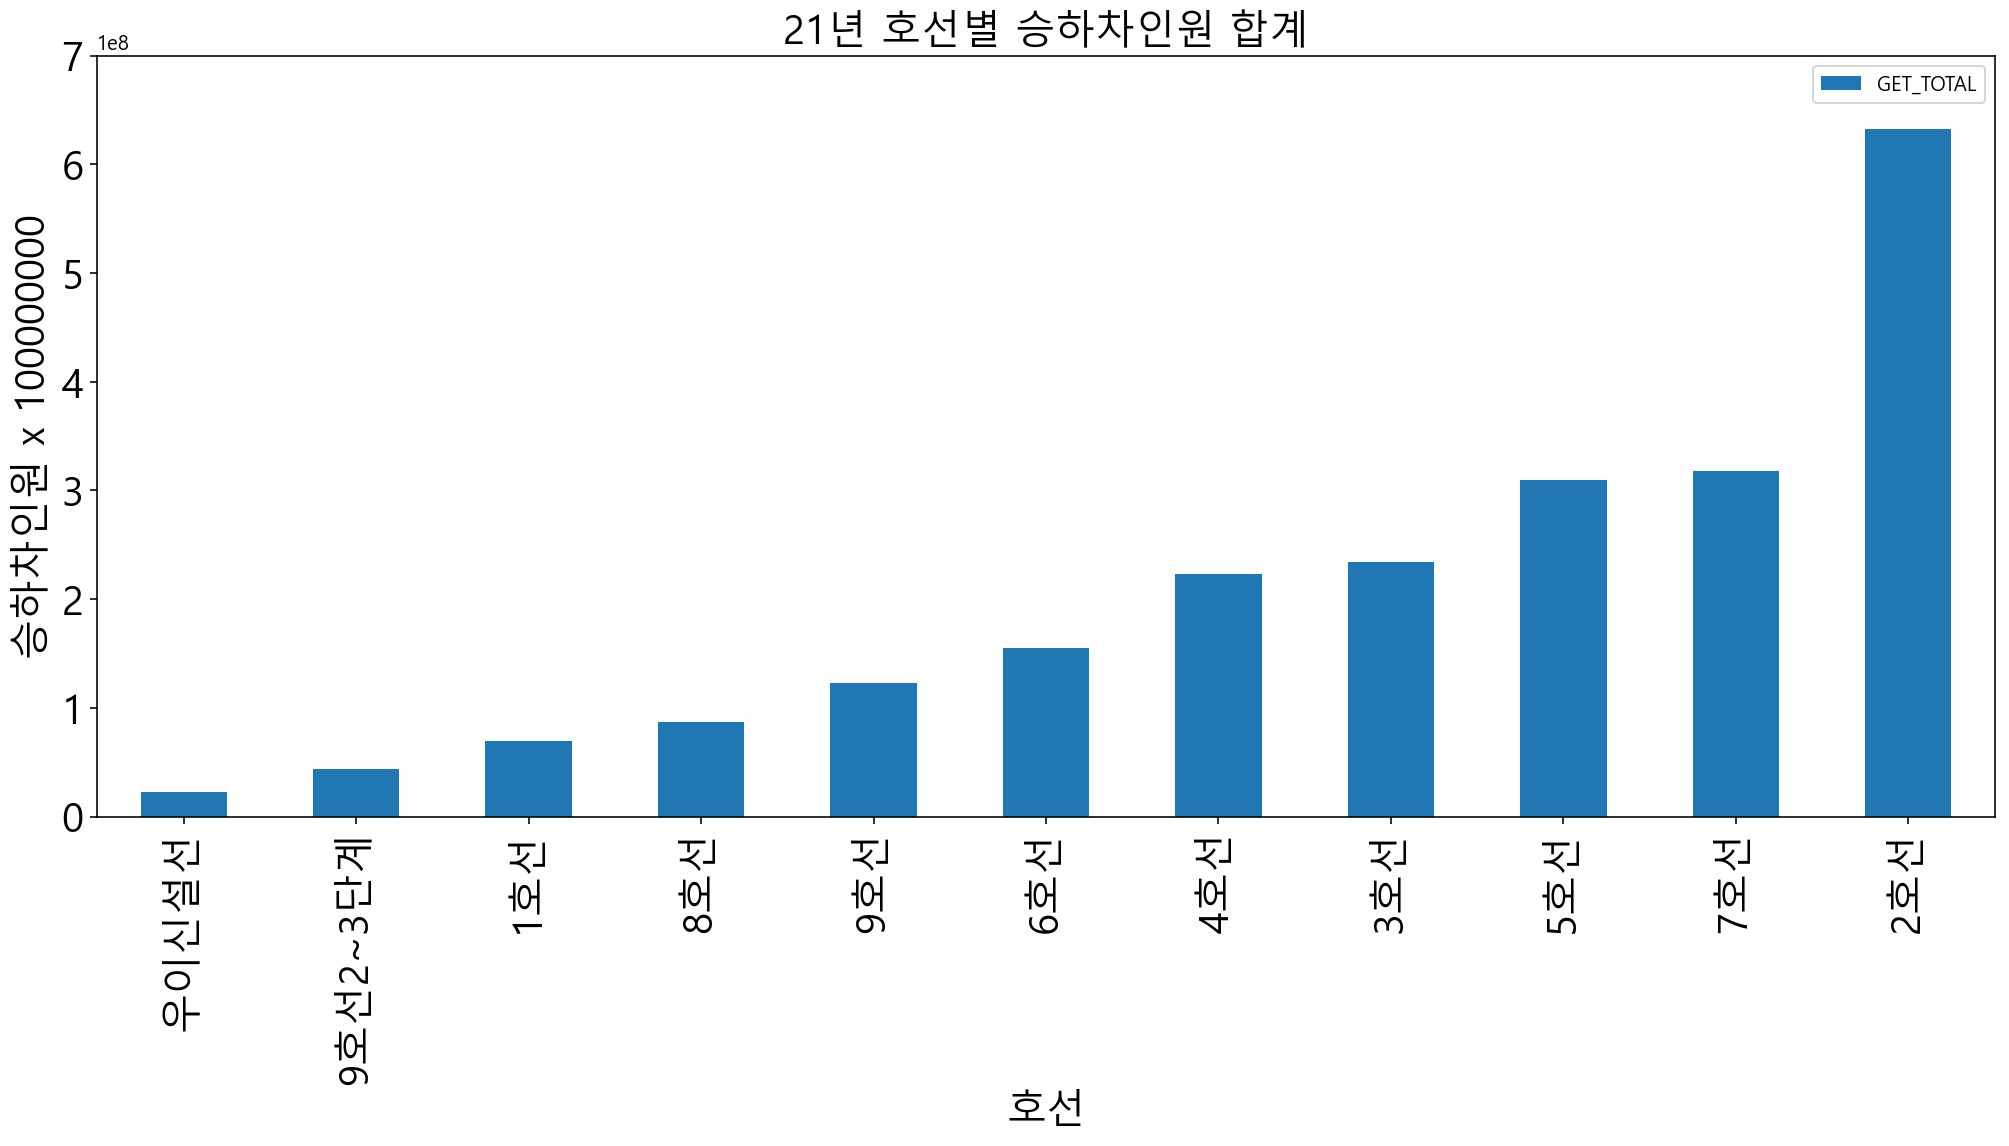

In [451]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize = (12, 12))
subway21_total.plot.bar(x = 'LINE_NM', y = 'GET_TOTAL', fontsize = 20, figsize = (17, 7))
plt.xlabel('호선', fontsize = 20)
plt.ylabel('승하차인원 x 100000000', fontsize = 20)
plt.ylim([0, 700000000])
plt.title("21년 호선별 승하차인원 합계", fontsize = 20)

## 역별 승하차인원 시각화

In [452]:
# 역별 승하차 인원 확인
subway21['GET_TOTAL'] = subway21['GETON_CNT'] + subway21['GETOFF_CNT']
subway21
subway21_sort = subway21.sort_values(ascending = False, by = 'GET_TOTAL')
subway21_sort.groupby(['STATION_NM', 'LINE_NM']).sum('GET_TOTAL')[['GET_TOTAL']].sort_values('GET_TOTAL', ascending = False).head(15)

,,GET_TOTAL
STATION_NM,LINE_NM,
강남,2호선,39321791
잠실(송파구청),2호선,34859312
신림,2호선,31166581
구로디지털단지,2호선,27919882
홍대입구,2호선,24607291
서울대입구(관악구청),2호선,23663886
삼성(무역센터),2호선,22896033
선릉,2호선,22516073
역삼,2호선,22192869


In [453]:
subway21 = subway21.pivot_table(index='STATION_NM', values=['GETON_CNT','GETOFF_CNT'], aggfunc='sum').reset_index()
subway21
subway21_sort = subway21.sort_values(by='GETOFF_CNT', ascending=False)
subway21_sort

,STATION_NM,GETOFF_CNT,GETON_CNT
234,잠실(송파구청),21310722,21089196
5,강남,19660167,19661624
20,고속터미널,18111401,18015888
177,신림,15334779,15831802
124,사당,14685789,14800449
...,...,...,...
239,장암,267825,602385
78,둔촌오륜,267690,293802
49,남태령,235189,277492
48,남위례,34830,30744


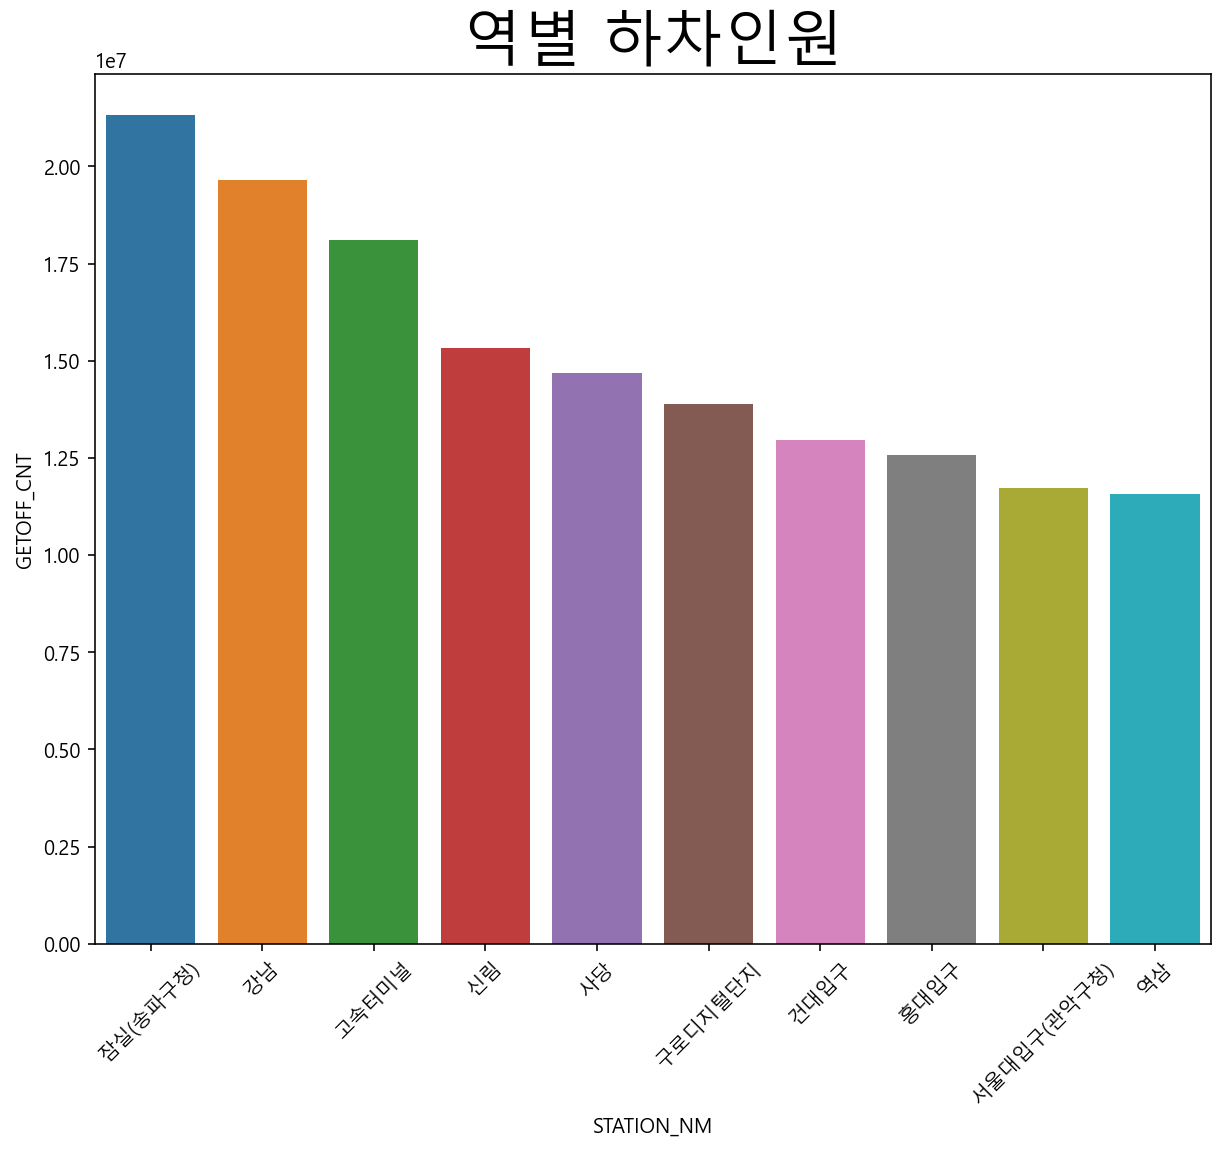

In [454]:
import seaborn as sns

sw_s = plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sw_s = plt.title('역별 하차인원', fontsize=30)
sw_s = sns.barplot(data=subway21_sort.head(10), x='STATION_NM', y='GETOFF_CNT')

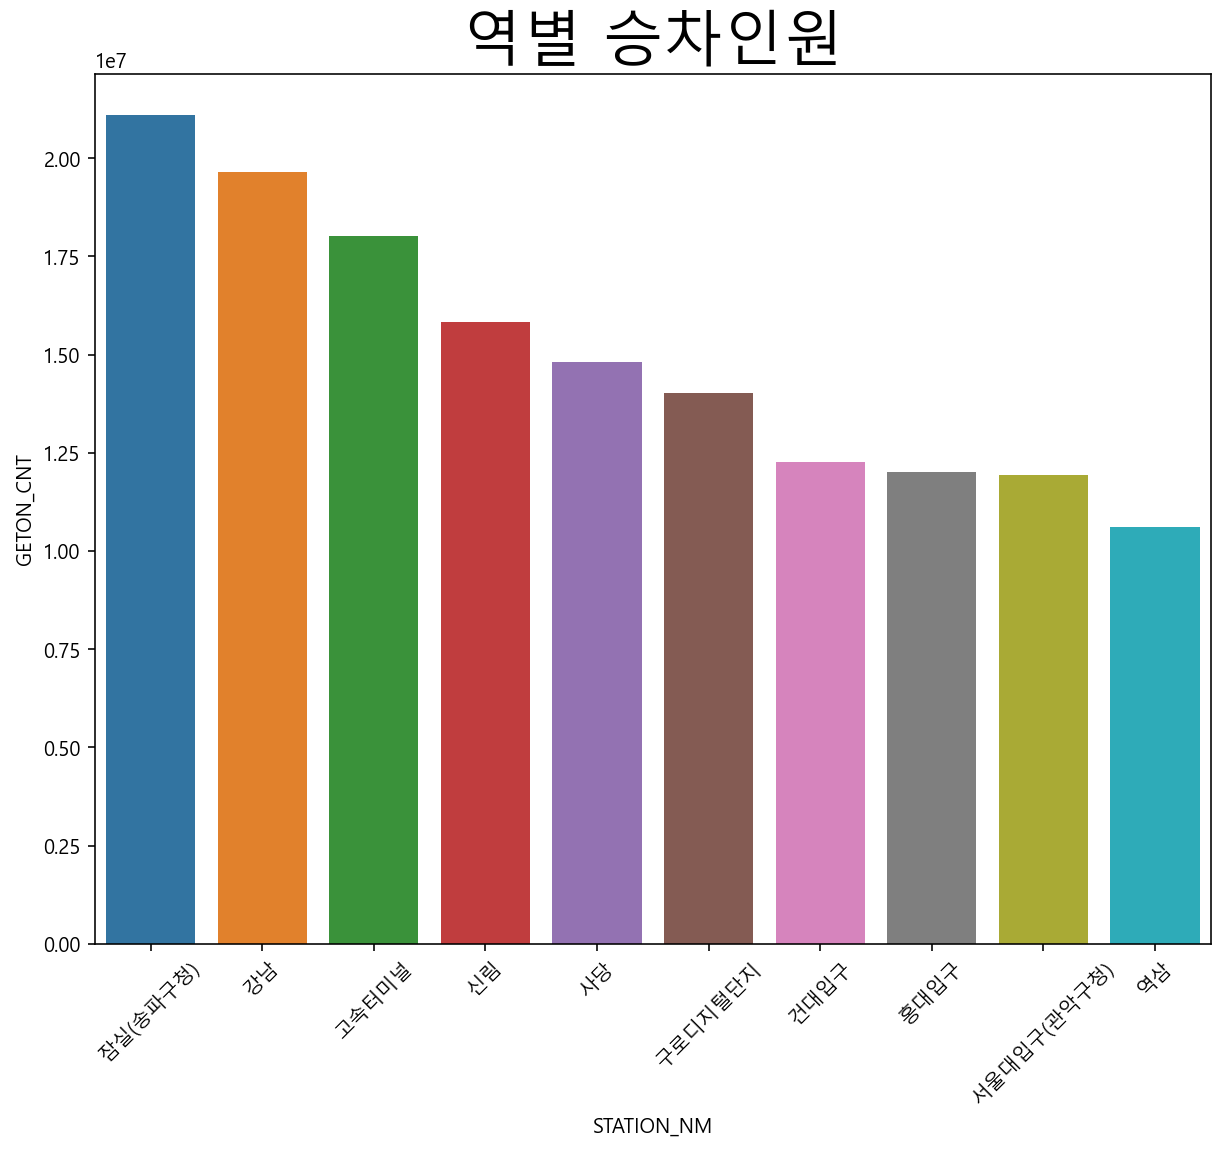

In [455]:
import seaborn as sns

sw_s = plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sw_s = plt.title('역별 승차인원', fontsize=30)
sw_s = sns.barplot(data=subway21_sort.head(10), x='STATION_NM', y='GETON_CNT')

# 강남과 잠실의 순서가 승차인원과 하차인원에서 다르다.

# STATN19: 수도권 지하철 공간데이터(19년)

* 지하철의 좌표값을 이용해 지도에 마커를 찍을 예정

In [456]:
# 필요한 컬럼만 뽑기

STATN19 = STATN19[['STN_NM','BB_RT', 'TM_X', 'TM_Y']]
STATN19

,STN_NM,BB_RT,TM_X,TM_Y
0,미아사거리,4,202653.112000,557083.212000
1,길음,4,202211.999200,555986.072800
2,성신여대입구,4,201448.475600,554789.239200
3,한성대입구,4,200549.379300,554326.801300
4,혜화,4,200162.857800,553647.385000
...,...,...,...,...
675,송산,의정부,207682.620246,570843.123742
676,탑석,의정부,207819.193238,570432.583073
677,성신여대입구,우이,201448.649054,554784.394200
678,보문,우이,201711.822463,553970.009115


In [457]:
# 5호선만 뽑아보리기

STATN19_5 = STATN19[STATN19["BB_RT"].str.contains('5')].reset_index(drop = True)
STATN19_5.head()

,STN_NM,BB_RT,TM_X,TM_Y
0,방화,5,183460.6294,553121.1899
1,개화산,5,182879.1880,552562.2672
2,김포공항,5,182425.2178,551457.3293
3,송정,5,183389.1858,551316.6236
4,마곡,5,184579.3985,551203.2401


In [458]:
# 7호선만 뽑기

STATN19_7 = STATN19[STATN19["BB_RT"].str.contains('7')].reset_index(drop = True)
STATN19_7.head()

,STN_NM,BB_RT,TM_X,TM_Y
0,장암,7,204690.7367,566718.9051
1,도봉산,7,204076.3717,565520.4514
2,수락산,7,204879.0448,564248.7379
3,마들,7,205088.0893,562816.1322
4,노원,7,205414.5985,561727.4211


In [459]:
# 2호선만 뽑기

STATN19_2 = STATN19[STATN19["BB_RT"].str.contains('2')].reset_index(drop = True)[:51]
STATN19_2.head()

,STN_NM,BB_RT,TM_X,TM_Y
0,시청,2,197977.7552,551692.4450
1,을지로입구,2,198464.5269,551836.1661
2,을지로3가,2,199285.3567,551867.2392
3,을지로4가,2,199830.3068,551938.9009
4,동대문역사문화공원,2,200697.5168,551738.8380


In [460]:
# 인덱스 순서 같게 하여 세로로 합치기

A = STATN19_5.append(STATN19_7).reset_index(drop = True)
STATN19_572 = A.append(STATN19_2).reset_index(drop = True)

In [461]:
# 잘 합쳐진건지 확인

STATN19_572

,STN_NM,BB_RT,TM_X,TM_Y
0,방화,5,183460.629400,553121.189900
1,개화산,5,182879.188000,552562.267200
2,김포공항,5,182425.217800,551457.329300
3,송정,5,183389.185800,551316.623600
4,마곡,5,184579.398500,551203.240100
...,...,...,...,...
148,도림천,2,189636.922600,546102.029000
149,양천구청,2,188138.364800,545894.398100
150,신정네거리,2,186998.713800,546747.951900
151,용두,2,203364.482800,552726.071500


In [462]:
# !pip install pyproj

In [463]:
# !pip install folium

In [464]:
# !pip install haversine

In [465]:
import pandas as pd
import numpy as np
import pyproj
# 지도 시각화
import folium as g
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

In [466]:
# TM좌표계를 위도/경도 좌표로 변환하기 위해 따로 뽑기

STATN19_xy = STATN19_572[["TM_X","TM_Y"]]

In [467]:
STATN19_xy

,TM_X,TM_Y
0,183460.629400,553121.189900
1,182879.188000,552562.267200
2,182425.217800,551457.329300
3,183389.185800,551316.623600
4,184579.398500,551203.240100
...,...,...
148,189636.922600,546102.029000
149,188138.364800,545894.398100
150,186998.713800,546747.951900
151,203364.482800,552726.071500


In [468]:
# TM -> 위도/경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [469]:
coord = np.array(STATN19_xy)
coord.shape

(153, 2)

In [470]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_sub = project_array(coord, p1_type, p2_type)
result_sub[:5]

array([[126.81276331,  37.5774913 ],
       [126.80619409,  37.57244484],
       [126.80108169,  37.56248091],
       [126.81199539,  37.56123104],
       [126.82546879,  37.56023014]])

In [471]:
STATN19_572["위도"] = result_sub[:, 1]

In [472]:
STATN19_572["경도"] = result_sub[:, 0]

In [473]:
STATN19_572

,STN_NM,BB_RT,TM_X,TM_Y,위도,경도
0,방화,5,183460.629400,553121.189900,37.577491,126.812763
1,개화산,5,182879.188000,552562.267200,37.572445,126.806194
2,김포공항,5,182425.217800,551457.329300,37.562481,126.801082
3,송정,5,183389.185800,551316.623600,37.561231,126.811995
4,마곡,5,184579.398500,551203.240100,37.560230,126.825469
...,...,...,...,...,...,...
148,도림천,2,189636.922600,546102.029000,37.514339,126.882782
149,양천구청,2,188138.364800,545894.398100,37.512450,126.865835
150,신정네거리,2,186998.713800,546747.951900,37.520125,126.852930
151,용두,2,203364.482800,552726.071500,37.574074,127.038086


In [474]:
STATN19_572 = STATN19_572.drop(['TM_X', 'TM_Y'], axis = 1)

In [475]:
STATN19_572

,STN_NM,BB_RT,위도,경도
0,방화,5,37.577491,126.812763
1,개화산,5,37.572445,126.806194
2,김포공항,5,37.562481,126.801082
3,송정,5,37.561231,126.811995
4,마곡,5,37.560230,126.825469
...,...,...,...,...
148,도림천,2,37.514339,126.882782
149,양천구청,2,37.512450,126.865835
150,신정네거리,2,37.520125,126.852930
151,용두,2,37.574074,127.038086


In [476]:
g_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)

In [477]:
# 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과

for item in STATN19_572.index:
    lat = STATN19_572.loc[item, '위도']
    long = STATN19_572.loc[item, '경도']
    g.Marker([lat, long],
                        fill = True).add_to(g_map)
g_map

## TBVIATR데이터셋: 서울시 주요시설, 집객시설 주요데이터(20년)

In [478]:
TBVIATR.head()

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30102,200,AA0000000001,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",NaN,NaN,NaN,214388.672913,551205.841919,NaN,156656.0,NaN,NaN,NaN
1,NaN,70301,302,AA0000000002,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214555.910095,550962.356812,NaN,156617.0,NaN,NaN,NaN
2,NaN,30102,200,AA0000000003,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,NaN,NaN,NaN,214224.118713,550979.324829,NaN,156670.0,NaN,NaN,NaN
3,NaN,30101,100,AA0000000004,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,NaN,NaN,NaN,214171.512024,550841.469116,NaN,155226.0,NaN,NaN,NaN
4,NaN,70301,302,AA0000000005,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214481.776611,550819.438110,NaN,155064.0,NaN,NaN,NaN


In [479]:
# 필요한 컬럼만 가져오기

TBVIATR = TBVIATR[["LCLASDC", "MLSFCDC", "X_VALUE", "Y_VALUE"]]
TBVIATR

,LCLASDC,MLSFCDC,X_VALUE,Y_VALUE
0,교육/보건,교육시설,214388.672913,551205.841919
1,산업,서비스산업,214555.910095,550962.356812
2,교육/보건,교육시설,214224.118713,550979.324829
3,교육/보건,교육시설,214171.512024,550841.469116
4,산업,서비스산업,214481.776611,550819.438110
...,...,...,...,...
19456,교육/보건,교육시설,191061.555317,544289.967983
19457,교육/보건,교육시설,191005.451446,542730.985067
19458,산업,서비스산업,191354.443045,541322.297120
19459,교육/보건,보건시설,188687.329239,547251.976724


In [480]:
# TM -> 위도/경도 좌표계 변환하기 위해 좌표만 끄집어냄

TBVIATR_xy = TBVIATR[["X_VALUE", "Y_VALUE"]]
TBVIATR_xy

,X_VALUE,Y_VALUE
0,214388.672913,551205.841919
1,214555.910095,550962.356812
2,214224.118713,550979.324829
3,214171.512024,550841.469116
4,214481.776611,550819.438110
...,...,...
19456,191061.555317,544289.967983
19457,191005.451446,542730.985067
19458,191354.443045,541322.297120
19459,188687.329239,547251.976724


In [481]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [482]:
coord = np.array(TBVIATR_xy)
coord.shape
#coord[:5]

(19461, 2)

In [483]:
coord.shape

(19461, 2)

In [484]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.16285188,  37.56027027],
       [127.16473985,  37.55807386],
       [127.16098506,  37.55823192],
       [127.16038702,  37.55699066],
       [127.16389801,  37.55678734]])

In [485]:
TBVIATR

,LCLASDC,MLSFCDC,X_VALUE,Y_VALUE
0,교육/보건,교육시설,214388.672913,551205.841919
1,산업,서비스산업,214555.910095,550962.356812
2,교육/보건,교육시설,214224.118713,550979.324829
3,교육/보건,교육시설,214171.512024,550841.469116
4,산업,서비스산업,214481.776611,550819.438110
...,...,...,...,...
19456,교육/보건,교육시설,191061.555317,544289.967983
19457,교육/보건,교육시설,191005.451446,542730.985067
19458,산업,서비스산업,191354.443045,541322.297120
19459,교육/보건,보건시설,188687.329239,547251.976724


In [486]:
TBVIATR["위도"] = result_imt[:, 1]
TBVIATR["경도"] = result_imt[:, 0]

In [487]:
TBVIATR = TBVIATR[["LCLASDC", "MLSFCDC", "위도", "경도"]]
TBVIATR

,LCLASDC,MLSFCDC,위도,경도
0,교육/보건,교육시설,37.560270,127.162852
1,산업,서비스산업,37.558074,127.164740
2,교육/보건,교육시설,37.558232,127.160985
3,교육/보건,교육시설,37.556991,127.160387
4,산업,서비스산업,37.556787,127.163898
...,...,...,...,...
19456,교육/보건,교육시설,37.498027,126.898918
19457,교육/보건,교육시설,37.483980,126.898303
19458,산업,서비스산업,37.471291,126.902265
19459,교육/보건,보건시설,37.524689,126.872023


In [488]:
# 역 이름과 호선 name으로 넣는 과정, 
# 역 이름과 호선별로 각 시설들이 몇개 씩 있는지 확인하기 위해 name을 설정하였다.
# 이 아래는 몇개씩 있는지 확인하는 과정이다.

STATN19_572_name = STATN19_572[['STN_NM', 'BB_RT']]
name = np.array(STATN19_572_name)
name[:5]

array([['방화', '5'],
       ['개화산', '5'],
       ['김포공항', '5'],
       ['송정', '5'],
       ['마곡', '5']], dtype=object)

In [489]:
# 시설의 개수 확인하기

TBVIATR.LCLASDC.value_counts()

교육/보건       13049
산업           2660
숙박/음식        2474
행정            607
레저/관광/예술      476
공공/환경         109
시설물            86
Name: LCLASDC, dtype: int64

In [490]:
result_sub = np.array(STATN19_572[['위도', '경도']])
result_imt = np.array(TBVIATR[['위도', '경도']])

In [491]:
TBVIATR.head()

,LCLASDC,MLSFCDC,위도,경도
0,교육/보건,교육시설,37.560270,127.162852
1,산업,서비스산업,37.558074,127.164740
2,교육/보건,교육시설,37.558232,127.160985
3,교육/보건,교육시설,37.556991,127.160387
4,산업,서비스산업,37.556787,127.163898


#### 교육/보건

In [492]:
from haversine import haversine, Unit

In [493]:
TBVIATR_edu_1 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_1 = TBVIATR_edu_1.loc["교육/보건"].reset_index()
TBVIATR_edu_1["LCLASDC"].head()

0    교육/보건
1    교육/보건
2    교육/보건
3    교육/보건
4    교육/보건
Name: LCLASDC, dtype: object

In [494]:
TBVIATR_edu_1

,LCLASDC,MLSFCDC,위도,경도
0,교육/보건,교육시설,37.560270,127.162852
1,교육/보건,교육시설,37.558232,127.160985
2,교육/보건,교육시설,37.556991,127.160387
3,교육/보건,교육시설,37.498516,127.102067
4,교육/보건,교육시설,37.497201,127.102680
...,...,...,...,...
13044,교육/보건,보건시설,37.450467,126.909474
13045,교육/보건,교육시설,37.498027,126.898918
13046,교육/보건,교육시설,37.483980,126.898303
13047,교육/보건,보건시설,37.524689,126.872023


In [495]:
TBVIATR_edu_result_1 = np.array(TBVIATR_edu_1[['위도', '경도']])
TBVIATR_edu_result_1

array([[ 37.56027027, 127.16285188],
       [ 37.55823192, 127.16098506],
       [ 37.55699066, 127.16038702],
       ...,
       [ 37.48398012, 126.89830273],
       [ 37.52468894, 126.87202331],
       [ 37.52722912, 127.03309306]])

In [496]:
# 역별로 교육/보건 시설의 개수

print("교육/보건\n")
sb3 = []
i = 0
for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0 
    for c, d in TBVIATR_edu_result_1:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb3.append(count)

교육/보건

['방화' '5'] -> 59 개
['개화산' '5'] -> 68 개
['김포공항' '5'] -> 34 개
['송정' '5'] -> 75 개
['마곡' '5'] -> 38 개
['발산' '5'] -> 86 개
['우장산' '5'] -> 175 개
['화곡' '5'] -> 208 개
['까치산' '5'] -> 152 개
['신정' '5'] -> 154 개
['목동' '5'] -> 154 개
['오목교' '5'] -> 63 개
['양평' '5'] -> 60 개
['영등포구청' '5'] -> 130 개
['영등포시장' '5'] -> 118 개
['신길' '5'] -> 77 개
['여의도' '5'] -> 48 개
['여의나루' '5'] -> 35 개
['마포' '5'] -> 72 개
['공덕' '5'] -> 90 개
['애오개' '5'] -> 95 개
['충정로' '5'] -> 132 개
['서대문' '5'] -> 126 개
['종로3가' '5'] -> 119 개
['을지로4가' '5'] -> 168 개
['동대문역사문화공원' '5'] -> 156 개
['청구' '5'] -> 115 개
['신금호' '5'] -> 104 개
['행당' '5'] -> 102 개
['마장' '5'] -> 114 개
['답십리' '5'] -> 81 개
['장한평' '5'] -> 53 개
['군자' '5'] -> 119 개
['아차산' '5'] -> 85 개
['광나루' '5'] -> 32 개
['천호' '5'] -> 114 개
['강동' '5'] -> 153 개
['길동' '5'] -> 132 개
['굽은다리' '5'] -> 117 개
['명일' '5'] -> 107 개
['고덕' '5'] -> 66 개
['상일동' '5'] -> 47 개
['둔촌동' '5'] -> 140 개
['올림픽공원' '5'] -> 56 개
['방이' '5'] -> 84 개
['오금' '5'] -> 104 개
['개롱' '5'] -> 109 개
['거여' '5'] -> 109 개
['마천' '5'] ->

In [549]:
# 교육/보건시설의 역에서 평균 거리

print("교육/보건\n")

dist_mean_1 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_1:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_1.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_1.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_1

교육/보건



[0.55,
 0.63,
 0.81,
 0.5,
 0.74,
 0.59,
 0.65,
 0.57,
 0.63,
 0.64,
 0.65,
 0.51,
 0.74,
 0.68,
 0.53,
 0.71,
 0.61,
 0.7,
 0.66,
 0.67,
 0.64,
 0.68,
 0.55,
 0.7,
 0.71,
 0.73,
 0.64,
 0.71,
 0.7,
 0.75,
 0.66,
 0.67,
 0.67,
 0.57,
 0.56,
 0.65,
 0.68,
 0.59,
 0.65,
 0.63,
 0.65,
 0.65,
 0.69,
 0.68,
 0.72,
 0.71,
 0.65,
 0.61,
 0.57,
 0.69,
 0.65,
 0,
 0.65,
 0.62,
 0.67,
 0.62,
 0.61,
 0.66,
 0.68,
 0.62,
 0.63,
 0.58,
 0.65,
 0.68,
 0.54,
 0.68,
 0.55,
 0.67,
 0.64,
 0.64,
 0.67,
 0.63,
 0.71,
 0.71,
 0.56,
 0.81,
 0.74,
 0.56,
 0.61,
 0.65,
 0.6,
 0.69,
 0.63,
 0.62,
 0.7,
 0.66,
 0.57,
 0.69,
 0.67,
 0.59,
 0.58,
 0.62,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.6,
 0.66,
 0.66,
 0.69,
 0.71,
 0.73,
 0.61,
 0.57,
 0.65,
 0.54,
 0.67,
 0.65,
 0.64,
 0.65,
 0.74,
 0.57,
 0.8,
 0.58,
 0.72,
 0.66,
 0.74,
 0.63,
 0.68,
 0.51,
 0.69,
 0.61,
 0.62,
 0.6,
 0.61,
 0.55,
 0.57,
 0.6,
 0.71,
 0.66,
 0.74,
 0.68,
 0.68,
 0.62,
 0.64,
 0.62,
 0.68,
 0.71,
 0.67,
 0.68,
 0.64,
 0.72,
 0.62,
 0.7

### 산업

In [498]:
TBVIATR_edu_2 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_2 = TBVIATR_edu_2.loc["산업"].reset_index()
TBVIATR_edu_2["LCLASDC"].head()

0    산업
1    산업
2    산업
3    산업
4    산업
Name: LCLASDC, dtype: object

In [499]:
TBVIATR_edu_result_2 = np.array(TBVIATR_edu_2[['위도', '경도']])
TBVIATR_edu_result_2

array([[ 37.55807386, 127.16473985],
       [ 37.55678734, 127.16389801],
       [ 37.56001763, 127.16372403],
       ...,
       [ 37.47204399, 126.89404121],
       [ 37.47217972, 126.89453114],
       [ 37.47129106, 126.90226514]])

In [500]:
# 역별로 산업 시설의 개수

print("산업\n")
sb4 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_2:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb4.append(count)

산업

['방화' '5'] -> 7 개
['개화산' '5'] -> 9 개
['김포공항' '5'] -> 9 개
['송정' '5'] -> 15 개
['마곡' '5'] -> 12 개
['발산' '5'] -> 20 개
['우장산' '5'] -> 17 개
['화곡' '5'] -> 15 개
['까치산' '5'] -> 12 개
['신정' '5'] -> 19 개
['목동' '5'] -> 25 개
['오목교' '5'] -> 23 개
['양평' '5'] -> 21 개
['영등포구청' '5'] -> 27 개
['영등포시장' '5'] -> 43 개
['신길' '5'] -> 34 개
['여의도' '5'] -> 56 개
['여의나루' '5'] -> 31 개
['마포' '5'] -> 32 개
['공덕' '5'] -> 33 개
['애오개' '5'] -> 21 개
['충정로' '5'] -> 24 개
['서대문' '5'] -> 32 개
['종로3가' '5'] -> 86 개
['을지로4가' '5'] -> 101 개
['동대문역사문화공원' '5'] -> 63 개
['청구' '5'] -> 35 개
['신금호' '5'] -> 21 개
['행당' '5'] -> 14 개
['마장' '5'] -> 27 개
['답십리' '5'] -> 16 개
['장한평' '5'] -> 16 개
['군자' '5'] -> 17 개
['아차산' '5'] -> 16 개
['광나루' '5'] -> 4 개
['천호' '5'] -> 24 개
['강동' '5'] -> 30 개
['길동' '5'] -> 20 개
['굽은다리' '5'] -> 24 개
['명일' '5'] -> 22 개
['고덕' '5'] -> 17 개
['상일동' '5'] -> 13 개
['둔촌동' '5'] -> 22 개
['올림픽공원' '5'] -> 9 개
['방이' '5'] -> 20 개
['오금' '5'] -> 19 개
['개롱' '5'] -> 12 개
['거여' '5'] -> 16 개
['마천' '5'] -> 15 개
['광화문' '5'] -> 51 개
['왕십리' 

In [550]:
# 산업시설의 역에서 평균 거리

print("산업\n")

dist_mean_2 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_2:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_2.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_2.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_2

산업



[0.56,
 0.55,
 0.86,
 0.6,
 0.79,
 0.5,
 0.71,
 0.61,
 0.66,
 0.63,
 0.7,
 0.52,
 0.76,
 0.59,
 0.57,
 0.8,
 0.68,
 0.73,
 0.52,
 0.6,
 0.72,
 0.72,
 0.64,
 0.46,
 0.64,
 0.67,
 0.69,
 0.67,
 0.71,
 0.69,
 0.56,
 0.58,
 0.57,
 0.66,
 0.61,
 0.54,
 0.69,
 0.67,
 0.57,
 0.58,
 0.66,
 0.62,
 0.58,
 0.75,
 0.6,
 0.65,
 0.7,
 0.63,
 0.56,
 0.67,
 0.66,
 0,
 0.69,
 0.52,
 0.55,
 0.55,
 0.6,
 0.57,
 0.67,
 0.49,
 0.6,
 0.6,
 0.7,
 0.69,
 0.58,
 0.59,
 0.68,
 0.57,
 0.67,
 0.6,
 0.68,
 0.69,
 0.66,
 0.67,
 0.63,
 0.72,
 0.56,
 0.51,
 0.73,
 0.58,
 0.64,
 0.59,
 0.7,
 0.6,
 0.72,
 0.65,
 0.64,
 0.65,
 0.78,
 0.71,
 0.69,
 0.63,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.61,
 0.6,
 0.63,
 0.65,
 0.64,
 0.67,
 0.58,
 0.78,
 0.66,
 0.63,
 0.56,
 0.61,
 0.6,
 0.65,
 0.6,
 0.5,
 0.61,
 0.64,
 0.83,
 0.6,
 0.68,
 0.59,
 0.65,
 0.64,
 0.62,
 0.61,
 0.5,
 0.52,
 0.65,
 0.54,
 0.58,
 0.61,
 0.73,
 0.65,
 0.64,
 0.7,
 0.59,
 0.57,
 0.6,
 0.7,
 0.5,
 0.67,
 0.65,
 0.72,
 0.78,
 0.62,
 0.58,
 0.74,
 0.66,
 0.4

### 숙박/음식

In [502]:
TBVIATR_edu_3 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_3 = TBVIATR_edu_3.loc["숙박/음식"].reset_index()
TBVIATR_edu_3["LCLASDC"].head()

0    숙박/음식
1    숙박/음식
2    숙박/음식
3    숙박/음식
4    숙박/음식
Name: LCLASDC, dtype: object

In [503]:
TBVIATR_edu_result_3 = np.array(TBVIATR_edu_3[['위도', '경도']])
TBVIATR_edu_result_3

array([[ 37.53804211, 127.12821378],
       [ 37.53833182, 127.12895978],
       [ 37.53820195, 127.12814859],
       ...,
       [ 37.50817955, 126.96237648],
       [ 37.50772692, 126.96191758],
       [ 37.47826728, 126.89486763]])

In [504]:
# 역별로 숙박/음식 시설의 개수

print("숙박/음식\n")
sb5 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_3:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb5.append(count)

숙박/음식

['방화' '5'] -> 3 개
['개화산' '5'] -> 3 개
['김포공항' '5'] -> 7 개
['송정' '5'] -> 8 개
['마곡' '5'] -> 2 개
['발산' '5'] -> 3 개
['우장산' '5'] -> 23 개
['화곡' '5'] -> 32 개
['까치산' '5'] -> 49 개
['신정' '5'] -> 19 개
['목동' '5'] -> 8 개
['오목교' '5'] -> 1 개
['양평' '5'] -> 14 개
['영등포구청' '5'] -> 39 개
['영등포시장' '5'] -> 94 개
['신길' '5'] -> 83 개
['여의도' '5'] -> 13 개
['여의나루' '5'] -> 3 개
['마포' '5'] -> 6 개
['공덕' '5'] -> 9 개
['애오개' '5'] -> 17 개
['충정로' '5'] -> 28 개
['서대문' '5'] -> 22 개
['종로3가' '5'] -> 101 개
['을지로4가' '5'] -> 122 개
['동대문역사문화공원' '5'] -> 102 개
['청구' '5'] -> 62 개
['신금호' '5'] -> 14 개
['행당' '5'] -> 35 개
['마장' '5'] -> 41 개
['답십리' '5'] -> 20 개
['장한평' '5'] -> 24 개
['군자' '5'] -> 18 개
['아차산' '5'] -> 11 개
['광나루' '5'] -> 4 개
['천호' '5'] -> 53 개
['강동' '5'] -> 82 개
['길동' '5'] -> 41 개
['굽은다리' '5'] -> 18 개
['명일' '5'] -> 4 개
['고덕' '5'] -> 2 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 20 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 2 개
['거여' '5'] -> 6 개
['마천' '5'] -> 6 개
['광화문' '5'] -> 34 개
['왕십리' '5'] -> 40 

In [551]:
# 숙박/음식시설의 역에서 평균 거리

print("숙박/음식\n")

dist_mean_3 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_3:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_3.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_3.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_3

숙박/음식



[0.51,
 0.46,
 0.72,
 0.28,
 0.93,
 0.27,
 0.91,
 0.73,
 0.57,
 0.78,
 0.74,
 0.18,
 0.59,
 0.59,
 0.54,
 0.72,
 0.84,
 0.71,
 0.46,
 0.47,
 0.67,
 0.69,
 0.71,
 0.51,
 0.74,
 0.63,
 0.73,
 0.73,
 0.81,
 0.74,
 0.57,
 0.59,
 0.56,
 0.53,
 0.51,
 0.45,
 0.62,
 0.39,
 0.89,
 0.59,
 0.62,
 0,
 0.79,
 0,
 0,
 0,
 0.96,
 0.77,
 0.35,
 0.75,
 0.39,
 0,
 0.54,
 0.71,
 0,
 0.5,
 0,
 0,
 0.81,
 0.42,
 0.83,
 0.57,
 0.54,
 0.76,
 0.53,
 0.63,
 0.55,
 0.56,
 0.6,
 0.73,
 0.84,
 0.62,
 0.53,
 0.72,
 0.73,
 0.82,
 0.52,
 0.56,
 0.5,
 0.87,
 0.05,
 0.8,
 0.65,
 0.47,
 0.55,
 0.84,
 0.57,
 0.69,
 0.84,
 0.49,
 0.87,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.62,
 0.71,
 0.75,
 0.66,
 0.74,
 0.63,
 0.62,
 0.62,
 0.39,
 0.75,
 0.47,
 0.74,
 0.73,
 0.66,
 0.67,
 0.8,
 0.74,
 0.42,
 0.76,
 0.76,
 0.63,
 0.55,
 0.66,
 0.68,
 0.7,
 0.52,
 0.34,
 0.97,
 0.29,
 0.86,
 0.23,
 0.68,
 0.63,
 0.84,
 0.73,
 0.66,
 0.59,
 0.49,
 0.59,
 0.64,
 0.38,
 0.73,
 0.45,
 0.69,
 0.77,
 0.73,
 0.53,
 0.74,
 0,
 0.47,
 0.7,


### 행정

In [506]:
TBVIATR_edu_4 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_4 = TBVIATR_edu_4.loc["행정"].reset_index()
TBVIATR_edu_4["LCLASDC"].head()

0    행정
1    행정
2    행정
3    행정
4    행정
Name: LCLASDC, dtype: object

In [507]:
TBVIATR_edu_result_4 = np.array(TBVIATR_edu_4[['위도', '경도']])
TBVIATR_edu_result_4

array([[ 37.49654608, 127.10993326],
       [ 37.59293371, 127.06575311],
       [ 37.58353155, 126.89368024],
       ...,
       [ 37.58693399, 126.98607813],
       [ 37.64067367, 127.01406449],
       [ 37.60264741, 126.92985768]])

In [508]:
# 역별로 행정 시설의 개수

print("행정\n")
sb6 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_4:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb6.append(count)

행정

['방화' '5'] -> 2 개
['개화산' '5'] -> 3 개
['김포공항' '5'] -> 2 개
['송정' '5'] -> 2 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 2 개
['우장산' '5'] -> 3 개
['화곡' '5'] -> 4 개
['까치산' '5'] -> 6 개
['신정' '5'] -> 3 개
['목동' '5'] -> 8 개
['오목교' '5'] -> 2 개
['양평' '5'] -> 6 개
['영등포구청' '5'] -> 10 개
['영등포시장' '5'] -> 7 개
['신길' '5'] -> 5 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 0 개
['마포' '5'] -> 7 개
['공덕' '5'] -> 9 개
['애오개' '5'] -> 4 개
['충정로' '5'] -> 4 개
['서대문' '5'] -> 11 개
['종로3가' '5'] -> 4 개
['을지로4가' '5'] -> 7 개
['동대문역사문화공원' '5'] -> 7 개
['청구' '5'] -> 10 개
['신금호' '5'] -> 8 개
['행당' '5'] -> 9 개
['마장' '5'] -> 6 개
['답십리' '5'] -> 3 개
['장한평' '5'] -> 4 개
['군자' '5'] -> 8 개
['아차산' '5'] -> 5 개
['광나루' '5'] -> 1 개
['천호' '5'] -> 10 개
['강동' '5'] -> 10 개
['길동' '5'] -> 5 개
['굽은다리' '5'] -> 4 개
['명일' '5'] -> 6 개
['고덕' '5'] -> 3 개
['상일동' '5'] -> 2 개
['둔촌동' '5'] -> 7 개
['올림픽공원' '5'] -> 3 개
['방이' '5'] -> 2 개
['오금' '5'] -> 3 개
['개롱' '5'] -> 3 개
['거여' '5'] -> 4 개
['마천' '5'] -> 4 개
['광화문' '5'] -> 15 개
['왕십리' '5'] -> 8 개
['장암' '7'] -> 0 개
['도봉산' '7'

In [552]:
# 행정시설의 역에서 평균 거리

print("행정\n")

dist_mean_4 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_4:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_4.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_4.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_4

행정



[0.52,
 0.86,
 0.79,
 0.55,
 0,
 0.82,
 0.59,
 0.58,
 0.62,
 0.52,
 0.88,
 0.73,
 0.75,
 0.52,
 0.79,
 0.76,
 0.77,
 0,
 0.67,
 0.64,
 0.66,
 0.59,
 0.81,
 0.59,
 0.7,
 0.61,
 0.66,
 0.61,
 0.65,
 0.81,
 0.67,
 0.79,
 0.52,
 0.64,
 0.18,
 0.75,
 0.84,
 0.67,
 0.65,
 0.75,
 0.75,
 0.58,
 0.72,
 0.71,
 0.49,
 0.47,
 0.76,
 0.46,
 0.53,
 0.63,
 0.55,
 0,
 0,
 0.23,
 0.53,
 0.56,
 0.86,
 0.55,
 0.53,
 0.76,
 0.43,
 0.52,
 0.67,
 0.64,
 0.58,
 0.51,
 0.73,
 0.52,
 0.7,
 0.76,
 0.44,
 0.72,
 0.47,
 0.73,
 0.79,
 0.61,
 0.84,
 0.66,
 0.62,
 0.49,
 0.58,
 0.71,
 0.58,
 0.88,
 0.52,
 0.73,
 0.66,
 0.87,
 0.39,
 0.54,
 0.24,
 0.71,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.76,
 0.47,
 0.65,
 0.61,
 0.7,
 0.61,
 0.59,
 0.63,
 0.55,
 0.81,
 0.46,
 0.56,
 0.76,
 0.56,
 0.4,
 0.65,
 0.47,
 0.62,
 0.68,
 0.55,
 0.89,
 0.65,
 0.6,
 0.75,
 0.85,
 0.37,
 0.58,
 0.67,
 0.45,
 0.82,
 0.54,
 0.62,
 0.63,
 0.73,
 0.83,
 0.77,
 0.52,
 0.73,
 0.55,
 0.98,
 0.79,
 0.36,
 0.73,
 0.59,
 0.46,
 0.87,
 0.81,
 0.75,
 

### 레저/관광/예술

In [510]:
TBVIATR_edu_5 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_5 = TBVIATR_edu_5.loc["레저/관광/예술"].reset_index()
TBVIATR_edu_5["LCLASDC"].head()

0    레저/관광/예술
1    레저/관광/예술
2    레저/관광/예술
3    레저/관광/예술
4    레저/관광/예술
Name: LCLASDC, dtype: object

In [511]:
TBVIATR_edu_result_5 = np.array(TBVIATR_edu_5[['위도', '경도']])
TBVIATR_edu_result_5[:5]

array([[ 37.49889341, 127.10445715],
       [ 37.57419305, 126.95891943],
       [ 37.46072539, 126.90504234],
       [ 37.47694521, 126.93793596],
       [ 37.4704393 , 126.91836431]])

In [512]:
#역별로 레저/관광/예술 시설의 개수

print("레저/관광/예술\n")
sb7 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_5:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb7.append(count)

레저/관광/예술

['방화' '5'] -> 1 개
['개화산' '5'] -> 1 개
['김포공항' '5'] -> 1 개
['송정' '5'] -> 1 개
['마곡' '5'] -> 2 개
['발산' '5'] -> 3 개
['우장산' '5'] -> 3 개
['화곡' '5'] -> 3 개
['까치산' '5'] -> 2 개
['신정' '5'] -> 3 개
['목동' '5'] -> 6 개
['오목교' '5'] -> 3 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 6 개
['영등포시장' '5'] -> 7 개
['신길' '5'] -> 3 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 1 개
['마포' '5'] -> 0 개
['공덕' '5'] -> 1 개
['애오개' '5'] -> 1 개
['충정로' '5'] -> 3 개
['서대문' '5'] -> 8 개
['종로3가' '5'] -> 29 개
['을지로4가' '5'] -> 7 개
['동대문역사문화공원' '5'] -> 4 개
['청구' '5'] -> 3 개
['신금호' '5'] -> 2 개
['행당' '5'] -> 1 개
['마장' '5'] -> 2 개
['답십리' '5'] -> 2 개
['장한평' '5'] -> 3 개
['군자' '5'] -> 4 개
['아차산' '5'] -> 2 개
['광나루' '5'] -> 1 개
['천호' '5'] -> 3 개
['강동' '5'] -> 3 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 1 개
['상일동' '5'] -> 2 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 7 개
['방이' '5'] -> 8 개
['오금' '5'] -> 3 개
['개롱' '5'] -> 3 개
['거여' '5'] -> 1 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 38 개
['왕십리' '5'] -> 0 개
['장암' '7'] -> 0 개
['도봉산' '

In [553]:
# 레저시설의 역에서 평균 거리

print("레저\n")

dist_mean_5 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_5:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_5.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_5.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_5

레저



[0.34,
 0.6,
 0.98,
 0.04,
 0.81,
 0.56,
 0.92,
 0.62,
 0.8,
 0.61,
 0.67,
 0.56,
 0,
 0.72,
 0.43,
 0.75,
 0.74,
 0.72,
 0,
 0.83,
 0.06,
 0.95,
 0.67,
 0.68,
 0.77,
 0.82,
 0.66,
 0.85,
 0.9,
 0.73,
 0.73,
 0.62,
 0.65,
 0.72,
 0.39,
 0.35,
 0.51,
 0,
 0,
 0,
 0.51,
 0.67,
 0,
 0.63,
 0.69,
 0.47,
 0.68,
 0.29,
 0,
 0.73,
 0,
 0,
 0,
 0.46,
 0,
 0,
 0.46,
 0.68,
 0.67,
 0.53,
 0.51,
 0.96,
 0.82,
 0,
 0,
 0.51,
 0.73,
 0.65,
 0.69,
 0.6,
 0.91,
 0.63,
 0.77,
 0.66,
 0.63,
 0.74,
 0.53,
 0.33,
 0.62,
 0.14,
 0.15,
 0.56,
 0.88,
 0.69,
 0,
 0.81,
 0.95,
 0.81,
 0,
 0,
 0.75,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.84,
 0.66,
 0.84,
 0.66,
 0.77,
 0.82,
 0.2,
 0.96,
 0,
 0,
 0.37,
 0.74,
 0.6,
 0.9,
 0,
 0.65,
 0.37,
 0,
 0.87,
 0.54,
 0.88,
 0.67,
 0.66,
 0.72,
 0.46,
 0.85,
 0.45,
 0.73,
 0,
 0.68,
 0.45,
 0.73,
 0.43,
 0.81,
 0.77,
 0.8,
 0.72,
 0.83,
 0.6,
 0.49,
 0.66,
 0.57,
 0.67,
 0.95,
 0.51,
 0.75,
 0.87,
 0,
 0.51,
 0.65,
 0.62,
 0.81]

### 공공/환경

In [514]:
TBVIATR_edu_6 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_6 = TBVIATR_edu_6.loc["공공/환경"].reset_index()
TBVIATR_edu_6["LCLASDC"].head()

0    공공/환경
1    공공/환경
2    공공/환경
3    공공/환경
4    공공/환경
Name: LCLASDC, dtype: object

In [515]:
TBVIATR_edu_result_6 = np.array(TBVIATR_edu_6[['위도', '경도']])
TBVIATR_edu_result_6[:5]

array([[ 37.46767352, 126.94480922],
       [ 37.51613554, 126.91214083],
       [ 37.50077829, 126.90856148],
       [ 37.48205824, 126.92792746],
       [ 37.51859504, 126.93167693]])

In [516]:
# 역별로 공공/환경 시설의 개수

print("공공/환경\n")
sb8 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_6:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb8.append(count)

공공/환경

['방화' '5'] -> 0 개
['개화산' '5'] -> 0 개
['김포공항' '5'] -> 0 개
['송정' '5'] -> 0 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 0 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 0 개
['까치산' '5'] -> 0 개
['신정' '5'] -> 0 개
['목동' '5'] -> 0 개
['오목교' '5'] -> 0 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 0 개
['영등포시장' '5'] -> 1 개
['신길' '5'] -> 1 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 1 개
['마포' '5'] -> 2 개
['공덕' '5'] -> 2 개
['애오개' '5'] -> 1 개
['충정로' '5'] -> 3 개
['서대문' '5'] -> 8 개
['종로3가' '5'] -> 3 개
['을지로4가' '5'] -> 1 개
['동대문역사문화공원' '5'] -> 4 개
['청구' '5'] -> 4 개
['신금호' '5'] -> 1 개
['행당' '5'] -> 0 개
['마장' '5'] -> 0 개
['답십리' '5'] -> 1 개
['장한평' '5'] -> 1 개
['군자' '5'] -> 0 개
['아차산' '5'] -> 0 개
['광나루' '5'] -> 0 개
['천호' '5'] -> 0 개
['강동' '5'] -> 0 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 0 개
['거여' '5'] -> 0 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 11 개
['왕십리' '5'] -> 0 개
['장암' '7'] -> 0 개
['도봉산' '7'] 

In [554]:
# 공공/환경시설의 역에서 평균 거리

print("공공/환경\n")

dist_mean_6 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_6:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_6.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_6.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_6

공공/환경



[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.96,
 0.46,
 0.74,
 0.96,
 0.89,
 0.39,
 0.84,
 0.7,
 0.63,
 0.89,
 0.78,
 0.6,
 0.54,
 0.72,
 0,
 0,
 0.3,
 0.91,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.59,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.86,
 0.43,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.6,
 0.77,
 0,
 0,
 0,
 0.76,
 0,
 0,
 0,
 0,
 0,
 0,
 0.14,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.63,
 0.74,
 0.86,
 0.78,
 0.6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.94,
 0.22,
 0,
 0,
 0.92,
 0.27,
 0,
 0,
 0.69,
 0.44,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.29,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.85,
 0,
 0.89,
 0.7,
 0.59,
 0.96,
 0,
 0,
 0,
 0,
 0,
 0]

### 시설물

In [518]:
TBVIATR_edu_7 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_7 = TBVIATR_edu_7.loc["시설물"].reset_index()
TBVIATR_edu_7["LCLASDC"].head()

0    시설물
1    시설물
2    시설물
3    시설물
4    시설물
Name: LCLASDC, dtype: object

In [519]:
TBVIATR_edu_result_7 = np.array(TBVIATR_edu_7[['위도', '경도']])
TBVIATR_edu_result_7[:5]

array([[ 37.57708864, 127.04994455],
       [ 37.4852527 , 126.90160758],
       [ 37.48755509, 126.9132976 ],
       [ 37.51334765, 126.92648565],
       [ 37.50241793, 126.88151226]])

In [520]:
# 역별로 시설물 시설의 개수

print("시설물\n")
sb9 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_7:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb9.append(count)

시설물

['방화' '5'] -> 2 개
['개화산' '5'] -> 6 개
['김포공항' '5'] -> 6 개
['송정' '5'] -> 4 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 0 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 1 개
['까치산' '5'] -> 1 개
['신정' '5'] -> 0 개
['목동' '5'] -> 0 개
['오목교' '5'] -> 0 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 0 개
['영등포시장' '5'] -> 0 개
['신길' '5'] -> 1 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 0 개
['마포' '5'] -> 1 개
['공덕' '5'] -> 1 개
['애오개' '5'] -> 0 개
['충정로' '5'] -> 2 개
['서대문' '5'] -> 0 개
['종로3가' '5'] -> 0 개
['을지로4가' '5'] -> 0 개
['동대문역사문화공원' '5'] -> 0 개
['청구' '5'] -> 0 개
['신금호' '5'] -> 0 개
['행당' '5'] -> 1 개
['마장' '5'] -> 1 개
['답십리' '5'] -> 1 개
['장한평' '5'] -> 0 개
['군자' '5'] -> 0 개
['아차산' '5'] -> 0 개
['광나루' '5'] -> 1 개
['천호' '5'] -> 0 개
['강동' '5'] -> 0 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 0 개
['거여' '5'] -> 0 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 0 개
['왕십리' '5'] -> 1 개
['장암' '7'] -> 0 개
['도봉산' '7'] -> 

In [555]:
# 시설물시설의 역에서 평균 거리

print("시설물\n")

dist_mean_7 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_7:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_7.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_7.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_7

시설물



[0.77,
 0.36,
 0.72,
 0.7,
 0,
 0,
 0,
 0.96,
 0.26,
 0,
 0,
 0,
 0,
 0,
 0,
 0.92,
 0.95,
 0,
 0.02,
 0.71,
 0,
 0.82,
 0,
 0,
 0,
 0,
 0,
 0,
 0.73,
 0.56,
 0.61,
 0,
 0,
 0,
 0.05,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.82,
 0,
 0.05,
 0.53,
 0,
 0,
 0,
 0.84,
 0.85,
 0.9,
 0.99,
 0.87,
 0.48,
 0.92,
 0,
 0,
 0,
 0,
 0,
 0.24,
 0.84,
 0.33,
 0,
 0,
 0,
 0.57,
 0.18,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.66,
 0.06,
 0,
 0,
 0,
 0.06,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.85,
 0,
 0.82,
 0.61,
 0.1,
 0.91,
 0.24,
 0.78,
 0.08,
 0,
 0,
 0,
 0,
 0.19,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.01,
 0.02,
 0,
 0.51,
 0,
 0,
 0,
 0,
 0,
 0.55,
 0.43,
 0,
 0.82,
 0.93,
 0.44,
 0.71,
 0.5,
 0,
 0,
 0.91,
 0.27]

In [522]:
#===========================================

## 우수중소기업 공간데이터

In [523]:
EXC =  pd.read_csv("data/EXC_df.csv")
EXC

,SMLPZ_ID,DEC_SE,CMPNY_NM,RPRSNTV_NM,INDUTY,FOND_DATE,ADDRES,TM_X,TM_Y
0,1,하이브랜드서울기업,벨금속공업㈜,이희평,날붙이 제조업,1978-01-12,서초구 효령로68길 92 (서초동),201762.893208,542899.588742
1,2,하이브랜드서울기업,㈜일성,지영배,액체 펌프 제조업,2000-01-03,구로구 경인로63길 21-6,189818.338312,545438.678543
2,3,하이브랜드서울기업,이앤에이치㈜,박대전,건설업본사,1998-05-01,"성동구 성수이로 7길 27, 701 (서울숲 코오롱디지털타워2차)",204724.207199,549119.988156
3,4,하이브랜드서울기업,㈜지넷시스템,서형덕,기타 무선 통신장비 제조업,1998-02-10,금천구 가산 디지털 2로 98 롯데아이티 캐슬 2동 6층,189481.128053,541984.760645
4,5,하이브랜드서울기업,㈜스페이스링크,양희식,컴퓨터시스템 통합 자문 및 구축 서비스업,1997-06-05,"마포구 매봉산로 37, 9층 905호 (DMC 산학협력연구센터)",190337.914065,552950.945367
...,...,...,...,...,...,...,...,...,...
684,685,서울형강소기업,한그린테크,김대현,제조업,2010-09-07,성북구 종암로 29,203178.254223,554812.267161
685,686,서울형강소기업,현대와코텍,신용성,제조,2004-05-20,노원구 노원로 15길 10 하계테크노타운 A-301,206350.871325,560260.897705
686,687,서울형강소기업,호스트센터(주),차성진,컴퓨터시스템 통합 자문 및 구축 서비스업,2002-05-23,"서초구 법원로3길 19, 3층(서초동, 양지원빌딩)",200746.667982,543731.172025
687,688,서울형강소기업,후스타일,김진석,"도소매, 제조, 무역, 전자상거래업, 건강식품 등",2005-08-30,금천구 가산디지털2로 115,189332.794053,542110.461550


In [524]:
# 필요 컬럼 선택

EXC = EXC[['DEC_SE', 'ADDRES', 'TM_X', 'TM_Y']]
EXC.head()

,DEC_SE,ADDRES,TM_X,TM_Y
0,하이브랜드서울기업,서초구 효령로68길 92 (서초동),201762.893208,542899.588742
1,하이브랜드서울기업,구로구 경인로63길 21-6,189818.338312,545438.678543
2,하이브랜드서울기업,"성동구 성수이로 7길 27, 701 (서울숲 코오롱디지털타워2차)",204724.207199,549119.988156
3,하이브랜드서울기업,금천구 가산 디지털 2로 98 롯데아이티 캐슬 2동 6층,189481.128053,541984.760645
4,하이브랜드서울기업,"마포구 매봉산로 37, 9층 905호 (DMC 산학협력연구센터)",190337.914065,552950.945367


In [525]:
# TM -> 위경도 좌표 변환을 위해 선택

EXC_xy = EXC[['TM_X', 'TM_Y']]

In [526]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [527]:
coord = np.array(EXC_xy)
coord.shape
#coord[:5]

(689, 2)

In [528]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.01993265,  37.48554134],
       [126.88484315,  37.50836426],
       [127.05345553,  37.54157698],
       [126.88107858,  37.4772405 ],
       [126.89062082,  37.57605522]])

In [529]:
EXC["위도"] = result_imt[:, 1]
EXC["경도"] = result_imt[:, 0]

In [530]:
# TM좌표계는 필요없으니 삭제

EXC =EXC.drop(['TM_X', 'TM_Y'], axis =1 )
EXC

,DEC_SE,ADDRES,위도,경도
0,하이브랜드서울기업,서초구 효령로68길 92 (서초동),37.485541,127.019933
1,하이브랜드서울기업,구로구 경인로63길 21-6,37.508364,126.884843
2,하이브랜드서울기업,"성동구 성수이로 7길 27, 701 (서울숲 코오롱디지털타워2차)",37.541577,127.053456
3,하이브랜드서울기업,금천구 가산 디지털 2로 98 롯데아이티 캐슬 2동 6층,37.477240,126.881079
4,하이브랜드서울기업,"마포구 매봉산로 37, 9층 905호 (DMC 산학협력연구센터)",37.576055,126.890621
...,...,...,...,...
684,서울형강소기업,성북구 종암로 29,37.592871,127.035987
685,서울형강소기업,노원구 노원로 15길 10 하계테크노타운 A-301,37.641946,127.071958
686,서울형강소기업,"서초구 법원로3길 19, 3층(서초동, 양지원빌딩)",37.493035,127.008443
687,서울형강소기업,금천구 가산디지털2로 115,37.478371,126.879400


In [531]:
EXC_result = np.array(EXC[['위도', '경도']])
EXC_result

array([[ 37.48554134, 127.01993265],
       [ 37.50836426, 126.88484315],
       [ 37.54157698, 127.05345553],
       ...,
       [ 37.49303535, 127.00844326],
       [ 37.47837137, 126.87939977],
       [ 37.52363997, 127.0300339 ]])

In [532]:
# 역별로 중소기업 시설의 개수

print("중소기업\n")
sb2 = []
i = 0
for a, b in result_sub:
    lyon = (a, b)    # 실제 지하철 역의 위도 경도값 설정
    count = 0 
    for c, d in EXC_result:
        paris=(c, d)    # 실제 시설의 위도 경도값 설정 
        A = haversine(lyon, paris) < 1   # haversine이용해서 지하철역의 반경 1km내에 위치하는 시설 찾기
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb2.append(count)

중소기업

['방화' '5'] -> 1 개
['개화산' '5'] -> 1 개
['김포공항' '5'] -> 0 개
['송정' '5'] -> 1 개
['마곡' '5'] -> 3 개
['발산' '5'] -> 4 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 0 개
['까치산' '5'] -> 0 개
['신정' '5'] -> 1 개
['목동' '5'] -> 2 개
['오목교' '5'] -> 1 개
['양평' '5'] -> 5 개
['영등포구청' '5'] -> 10 개
['영등포시장' '5'] -> 3 개
['신길' '5'] -> 5 개
['여의도' '5'] -> 12 개
['여의나루' '5'] -> 8 개
['마포' '5'] -> 9 개
['공덕' '5'] -> 10 개
['애오개' '5'] -> 2 개
['충정로' '5'] -> 4 개
['서대문' '5'] -> 6 개
['종로3가' '5'] -> 8 개
['을지로4가' '5'] -> 9 개
['동대문역사문화공원' '5'] -> 3 개
['청구' '5'] -> 2 개
['신금호' '5'] -> 1 개
['행당' '5'] -> 0 개
['마장' '5'] -> 0 개
['답십리' '5'] -> 1 개
['장한평' '5'] -> 4 개
['군자' '5'] -> 2 개
['아차산' '5'] -> 1 개
['광나루' '5'] -> 0 개
['천호' '5'] -> 0 개
['강동' '5'] -> 0 개
['길동' '5'] -> 1 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 2 개
['올림픽공원' '5'] -> 2 개
['방이' '5'] -> 2 개
['오금' '5'] -> 5 개
['개롱' '5'] -> 7 개
['거여' '5'] -> 4 개
['마천' '5'] -> 3 개
['광화문' '5'] -> 5 개
['왕십리' '5'] -> 0 개
['장암' '7'] -> 0 개
['도봉산' '7']

In [556]:
# 중소기업시설의 역에서 평균 거리

print("중소기업\n")

dist_mean_8 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in EXC_result:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_8.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_8.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_8

중소기업



[0.96,
 0.68,
 0,
 0.27,
 0.74,
 0.68,
 0,
 0,
 0,
 0.07,
 0.89,
 0.98,
 0.53,
 0.63,
 0.53,
 0.77,
 0.6,
 0.79,
 0.54,
 0.54,
 0.88,
 0.6,
 0.52,
 0.68,
 0.8,
 0.69,
 0.65,
 0.78,
 0,
 0,
 0.18,
 0.65,
 0.54,
 0.35,
 0,
 0,
 0,
 0.84,
 0,
 0,
 0,
 0,
 0.54,
 0.87,
 0.84,
 0.71,
 0.73,
 0.63,
 0.65,
 0.35,
 0,
 0,
 0.46,
 0.58,
 0.89,
 0,
 0.74,
 0.71,
 0.86,
 0.17,
 0.89,
 0.22,
 0.67,
 0.56,
 0.94,
 0.98,
 0.53,
 0.54,
 0.89,
 0.87,
 0,
 0.85,
 0.73,
 0.63,
 0.64,
 0.66,
 0,
 0.57,
 0.74,
 0,
 0,
 0,
 0,
 0,
 0,
 0.8,
 0.74,
 0.5,
 0.94,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.72,
 0.69,
 0.7,
 0.8,
 0.69,
 0.62,
 0.86,
 0,
 0.86,
 0.63,
 0.5,
 0.87,
 0.62,
 0.21,
 0.63,
 0.29,
 0.54,
 0.72,
 0.55,
 0.61,
 0.6,
 0.64,
 0.61,
 0.46,
 0.65,
 0.58,
 0,
 0,
 0,
 0,
 0,
 0.61,
 0.8,
 0.72,
 0.57,
 0.63,
 0.68,
 0.6,
 0.61,
 0.74,
 0.93,
 0,
 0.6,
 0.6,
 0.83,
 0.47,
 0.63,
 0,
 0.72,
 0.7,
 0]

In [564]:
# 각 시설별 역과의 평균거리를 가지고 총 평균거리 구하기


final_dist_mean = []

for i in range(153):
    sum = 0
    sum += dist_mean_1[i] + dist_mean_2[i] + dist_mean_3[i] + dist_mean_4[i] + dist_mean_5[i] + dist_mean_6[i] + dist_mean_7[i] + dist_mean_8[i]
    final_dist_mean.append(round(sum / 8, 2))

final_dist_mean

[0.53,
 0.52,
 0.61,
 0.37,
 0.5,
 0.43,
 0.47,
 0.51,
 0.44,
 0.41,
 0.57,
 0.43,
 0.42,
 0.47,
 0.54,
 0.74,
 0.74,
 0.58,
 0.47,
 0.61,
 0.56,
 0.72,
 0.57,
 0.56,
 0.64,
 0.59,
 0.57,
 0.63,
 0.56,
 0.53,
 0.53,
 0.6,
 0.44,
 0.43,
 0.29,
 0.34,
 0.42,
 0.39,
 0.34,
 0.32,
 0.4,
 0.32,
 0.42,
 0.46,
 0.42,
 0.38,
 0.56,
 0.42,
 0.33,
 0.55,
 0.38,
 0.0,
 0.3,
 0.46,
 0.33,
 0.28,
 0.41,
 0.61,
 0.69,
 0.49,
 0.61,
 0.54,
 0.57,
 0.53,
 0.4,
 0.49,
 0.47,
 0.44,
 0.52,
 0.56,
 0.55,
 0.56,
 0.56,
 0.61,
 0.5,
 0.62,
 0.42,
 0.49,
 0.48,
 0.34,
 0.25,
 0.42,
 0.43,
 0.41,
 0.33,
 0.56,
 0.6,
 0.53,
 0.45,
 0.29,
 0.39,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.43,
 0.56,
 0.62,
 0.6,
 0.64,
 0.59,
 0.51,
 0.55,
 0.38,
 0.53,
 0.41,
 0.59,
 0.56,
 0.72,
 0.36,
 0.47,
 0.41,
 0.46,
 0.61,
 0.48,
 0.55,
 0.55,
 0.54,
 0.61,
 0.47,
 0.45,
 0.38,
 0.44,
 0.25,
 0.43,
 0.33,
 0.41,
 0.47,
 0.56,
 0.62,
 0.52,
 0.47,
 0.49,
 0.45,
 0.51,
 0.64,
 0.55,
 0.51,
 0.72,
 0.

In [534]:
# 지하철역이름 및 호선

i = 0
sb = []
for a, b in result_sub:
    sb.append(name[i])
    i+= 1
sb[:5]

[array(['방화', '5'], dtype=object),
 array(['개화산', '5'], dtype=object),
 array(['김포공항', '5'], dtype=object),
 array(['송정', '5'], dtype=object),
 array(['마곡', '5'], dtype=object)]

In [535]:
# 데이터프레임화 시키기

facilities_count = pd.DataFrame(data = list(zip(sb, sb2, sb3, sb4, sb5, sb6, sb7, sb8, sb9)), columns = ['지하철', '우수중소기업', '교육/보건', '산업', '숙박/음식', '행정', '레저/관광/예술', '공공/환경', '시설물'])

In [536]:
facilities_count.set_index('지하철')

,우수중소기업,교육/보건,산업,숙박/음식,행정,레저/관광/예술,공공/환경,시설물
지하철,,,,,,,,
"[방화, 5]",1,59,7,3,2,1,0,2
"[개화산, 5]",1,68,9,3,3,1,0,6
"[김포공항, 5]",0,34,9,7,2,1,0,6
"[송정, 5]",1,75,15,8,2,1,0,4
"[마곡, 5]",3,38,12,2,0,2,0,0
...,...,...,...,...,...,...,...,...
"[도림천, 2]",3,48,16,4,2,0,0,2
"[양천구청, 2]",0,62,8,0,7,1,0,0
"[신정네거리, 2]",3,124,14,9,3,1,0,0


In [537]:
# 각 시설의 수 합치기

sb10 = facilities_count['우수중소기업'] + facilities_count['교육/보건'] + facilities_count['산업']\
+ facilities_count['숙박/음식'] + facilities_count['행정'] + facilities_count['레저/관광/예술'] + facilities_count['공공/환경']\
+ facilities_count['시설물']
facilities_count['총 합'] = sb10

In [565]:
# 앞서 구한 총 평균거리 넣기

facilities_count['평균거리'] = final_dist_mean

In [567]:
facilities_count.tail()

,지하철,우수중소기업,교육/보건,산업,숙박/음식,행정,레저/관광/예술,공공/환경,시설물,총 합,평균거리
148,"[도림천, 2]",3,48,16,4,2,0,0,2,75,0.51
149,"[양천구청, 2]",0,62,8,0,7,1,0,0,78,0.31
150,"[신정네거리, 2]",3,124,14,9,3,1,0,0,154,0.44
151,"[용두, 2]",1,155,31,44,5,4,0,1,241,0.61
152,"[까치산, 2]",0,152,12,49,6,2,0,1,222,0.45


### facilities_count를 이용하여 지하철역 별로 시설의 총합 시각화 

In [568]:
from folium.plugins import MarkerCluster

# 위도
latitude = 37.394946
# 경도
longitude = 127.111104

m = g.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = STATN19_572[['위도', '경도']]


marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    g.Marker([lat, long], icon = g.Icon(color="green")).add_to(marker_cluster)
m

In [569]:
sub_list = [0] * 153
a = ''
n = 0
for i, v in facilities_count.지하철:
    a = i + '-' + v
    sub_list[n] = a
    n += 1
sub_list

['방화-5',
 '개화산-5',
 '김포공항-5',
 '송정-5',
 '마곡-5',
 '발산-5',
 '우장산-5',
 '화곡-5',
 '까치산-5',
 '신정-5',
 '목동-5',
 '오목교-5',
 '양평-5',
 '영등포구청-5',
 '영등포시장-5',
 '신길-5',
 '여의도-5',
 '여의나루-5',
 '마포-5',
 '공덕-5',
 '애오개-5',
 '충정로-5',
 '서대문-5',
 '종로3가-5',
 '을지로4가-5',
 '동대문역사문화공원-5',
 '청구-5',
 '신금호-5',
 '행당-5',
 '마장-5',
 '답십리-5',
 '장한평-5',
 '군자-5',
 '아차산-5',
 '광나루-5',
 '천호-5',
 '강동-5',
 '길동-5',
 '굽은다리-5',
 '명일-5',
 '고덕-5',
 '상일동-5',
 '둔촌동-5',
 '올림픽공원-5',
 '방이-5',
 '오금-5',
 '개롱-5',
 '거여-5',
 '마천-5',
 '광화문-5',
 '왕십리-5',
 '장암-7',
 '도봉산-7',
 '수락산-7',
 '마들-7',
 '노원-7',
 '중계-7',
 '하계-7',
 '공릉-7',
 '태릉입구-7',
 '먹골-7',
 '중화-7',
 '상봉-7',
 '면목-7',
 '사가정-7',
 '용마산-7',
 '중곡-7',
 '군자-7',
 '어린이대공원-7',
 '건대입구-7',
 '뚝섬유원지-7',
 '청담-7',
 '강남구청-7',
 '학동-7',
 '논현-7',
 '반포-7',
 '고속터미널-7',
 '내방-7',
 '총신대입구(이수)-7',
 '남성-7',
 '숭실대입구-7',
 '상도-7',
 '장승배기-7',
 '보라매-7',
 '신풍-7',
 '대림-7',
 '남구로-7',
 '가산디지털단지-7',
 '철산-7',
 '광명사거리-7',
 '천왕-7',
 '온수-7',
 '까치울-7',
 '부천종합운동장-7',
 '춘의-7',
 '신중동-7',
 '부천시청-7',
 '상동-7',
 '삼산체육관-7',
 '굴포천-7',
 

In [570]:
facilities_count['지하철-호선'] = sub_list

In [571]:
facilities_count = facilities_count.drop(['지하철'], axis = 1)
facilities_count

,우수중소기업,교육/보건,산업,숙박/음식,행정,레저/관광/예술,공공/환경,시설물,총 합,평균거리,지하철-호선
0,1,59,7,3,2,1,0,2,75,0.53,방화-5
1,1,68,9,3,3,1,0,6,91,0.52,개화산-5
2,0,34,9,7,2,1,0,6,59,0.61,김포공항-5
3,1,75,15,8,2,1,0,4,106,0.37,송정-5
4,3,38,12,2,0,2,0,0,57,0.50,마곡-5
...,...,...,...,...,...,...,...,...,...,...,...
148,3,48,16,4,2,0,0,2,75,0.51,도림천-2
149,0,62,8,0,7,1,0,0,78,0.31,양천구청-2
150,3,124,14,9,3,1,0,0,154,0.44,신정네거리-2
151,1,155,31,44,5,4,0,1,241,0.61,용두-2


### 머신러닝전 추가 전처리

In [572]:
subway21 = pd.read_csv("data/subway21_df.csv", index_col = ['STATION_NM', 'LINE_NM'])

In [573]:
# 역별 승하차 인원 확인
subway21['GET_TOTAL'] = subway21['GETON_CNT'] + subway21['GETOFF_CNT']
subway21
subway21_sort = subway21.sort_values(ascending = False, by = 'GET_TOTAL')
subway21_sort = subway21.groupby(['STATION_NM', 'LINE_NM']).sum('GET_TOTAL')[['GET_TOTAL']].sort_values('GET_TOTAL', ascending = False)

In [574]:
subway21_sort = subway21_sort.reset_index(drop=False)
subway21_sort

,STATION_NM,LINE_NM,GET_TOTAL
0,강남,2호선,39321791
1,잠실(송파구청),2호선,34859312
2,신림,2호선,31166581
3,구로디지털단지,2호선,27919882
4,홍대입구,2호선,24607291
...,...,...,...
330,남태령,4호선,512681
331,남위례,8호선,65574
332,연신내,6호선,227
333,충무로,3호선,184


In [575]:
import re

In [576]:
# STATION_NM의 괄호 + 괄호안 내용 없애기 

rmve_bracket = "\(.*\)|\s-\s.*"
name_list = []
for i in subway21_sort.STATION_NM:
    i = re.sub(rmve_bracket, '',i)
    name_list.append(i)
name_list

['강남',
 '잠실',
 '신림',
 '구로디지털단지',
 '홍대입구',
 '서울대입구',
 '삼성',
 '선릉',
 '역삼',
 '고속터미널',
 '신도림',
 '양재',
 '건대입구',
 '사당',
 '을지로입구',
 '수유',
 '성수',
 '가산디지털단지',
 '연신내',
 '교대',
 '강변',
 '신촌',
 '합정',
 '압구정',
 '신논현',
 '혜화',
 '쌍문',
 '신사',
 '까치산',
 '광화문',
 '미아사거리',
 '화곡',
 '서울역',
 '남부터미널',
 '낙성대',
 '신대방',
 '여의도',
 '구의',
 '대림',
 '창동',
 '봉천',
 '오목교',
 '충무로',
 '노량진',
 '여의도',
 '뚝섬',
 '학동',
 '잠실새내',
 '사당',
 '노원',
 '회현',
 '광명사거리',
 '성신여대입구',
 '천호',
 '시청',
 '노원',
 '길음',
 '영등포구청',
 '철산',
 '논현',
 '당산',
 '을지로3가',
 '문정',
 '서초',
 '청담',
 '강동',
 '문래',
 '수서',
 '가양',
 '암사',
 '상계',
 '발산',
 '구파발',
 '종각',
 '장한평',
 '총신대입구',
 '목동',
 '당산',
 '경복궁',
 '종로3가',
 '하계',
 '안국',
 '응암',
 '천호',
 '상봉',
 '사가정',
 '동대문',
 '장지',
 '서대문',
 '방배',
 '미사',
 '염창',
 '강남구청',
 '상일동',
 '홍제',
 '신대방삼거리',
 '면목',
 '명동',
 '아차산',
 '불광',
 '이수',
 '답십리',
 '잠실',
 '신용산',
 '공덕',
 '망원',
 '봉은사',
 '미아',
 '고속터미널',
 '고속터미널',
 '녹번',
 '종로5가',
 '신당',
 '청량리',
 '우장산',
 '남구로',
 '내방',
 '광나루',
 '상왕십리',
 '합정',
 '동대문역사문화공원',
 '잠실나루',
 '한성대입구',
 '왕십리',
 '마포구청',
 '공덕',
 '제기동',
 

In [577]:
subway21_sort['STATION_NM'] = name_list

In [578]:
subway21_sort

,STATION_NM,LINE_NM,GET_TOTAL
0,강남,2호선,39321791
1,잠실,2호선,34859312
2,신림,2호선,31166581
3,구로디지털단지,2호선,27919882
4,홍대입구,2호선,24607291
...,...,...,...
330,남태령,4호선,512681
331,남위례,8호선,65574
332,연신내,6호선,227
333,충무로,3호선,184


In [579]:
# 5호선만 뽑기

subway21_sort_5 = subway21_sort[subway21_sort["LINE_NM"].str.contains('5호선')].reset_index(drop = True)
subway21_sort_5

,STATION_NM,LINE_NM,GET_TOTAL
0,까치산,5호선,14182424
1,광화문,5호선,14146354
2,화곡,5호선,14015601
3,여의도,5호선,12403928
4,오목교,5호선,11274588
5,천호,5호선,10097316
6,강동,5호선,9499056
7,발산,5호선,9259453
8,장한평,5호선,9010695
9,목동,5호선,8840757


In [580]:
# 7호선만 뽑기

subway21_sort_7 = subway21_sort[subway21_sort["LINE_NM"].str.contains('7호선')].reset_index(drop = True)
subway21_sort_7

,STATION_NM,LINE_NM,GET_TOTAL
0,가산디지털단지,7호선,17049058
1,학동,7호선,10764425
2,광명사거리,7호선,10347990
3,노원,7호선,10043655
4,철산,7호선,9953982
5,논현,7호선,9848719
6,청담,7호선,9628647
7,하계,7호선,8554279
8,상봉,7호선,8397365
9,사가정,7호선,8354238


In [581]:
# 2호선만 뽑기

subway21_sort_2 = subway21_sort[subway21_sort["LINE_NM"].str.contains('2호선')].reset_index(drop = True)
subway21_sort_2

,STATION_NM,LINE_NM,GET_TOTAL
0,강남,2호선,39321791
1,잠실,2호선,34859312
2,신림,2호선,31166581
3,구로디지털단지,2호선,27919882
4,홍대입구,2호선,24607291
5,서울대입구,2호선,23663886
6,삼성,2호선,22896033
7,선릉,2호선,22516073
8,역삼,2호선,22192869
9,신도림,2호선,20581735


In [582]:
# 2,5,7호선 정보 합치기
A = subway21_sort_2.append(subway21_sort_5).reset_index(drop = True)
subway21_572 = A.append(subway21_sort_7).reset_index(drop = True)

In [583]:
subway21_572

,STATION_NM,LINE_NM,GET_TOTAL
0,강남,2호선,39321791
1,잠실,2호선,34859312
2,신림,2호선,31166581
3,구로디지털단지,2호선,27919882
4,홍대입구,2호선,24607291
...,...,...,...
152,용마산,7호선,3076887
153,반포,7호선,2873882
154,삼산체육관,7호선,2050929
155,부천종합운동장,7호선,2050168


In [584]:
# 역이름 및 호선번호만 따로 뽑아 새로운 컬럼에 각각 넣기

new2 = []
new3 = []

for i in range(153):
    a = facilities_count.loc[i,'지하철-호선']
    new2.append(a[:-2])
    
for i in range(153):
    b = facilities_count.loc[i, '지하철-호선']
    new3.append(b[-1])
facilities_count['지하철'] = new2
facilities_count['호선'] = new3

In [585]:
subway21_572 = subway21_572.rename(columns = {'STATION_NM':'지하철'})

In [593]:
merge_df = pd.merge(facilities_count,subway21_572, on="지하철")
merge_df = merge_df.drop(['지하철-호선','호선'], axis = 1)

In [594]:
merge_df = merge_df.drop_duplicates(['지하철'])
merge_df = merge_df.rename(columns = {'LINE_NM':'호선', 'GET_TOTAL':'승하차인원'})
merge_df

,우수중소기업,교육/보건,산업,숙박/음식,행정,레저/관광/예술,공공/환경,시설물,총 합,평균거리,지하철,호선,승하차인원
0,1,59,7,3,2,1,0,2,75,0.53,방화,5호선,3148408
1,1,68,9,3,3,1,0,6,91,0.52,개화산,5호선,2506452
2,0,34,9,7,2,1,0,6,59,0.61,김포공항,5호선,3718314
3,1,75,15,8,2,1,0,4,106,0.37,송정,5호선,3297282
4,3,38,12,2,0,2,0,0,57,0.50,마곡,5호선,4570357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2,81,27,57,8,2,0,1,178,0.57,신설동,2호선,1568224
164,3,48,16,4,2,0,0,2,75,0.51,도림천,2호선,635911
165,0,62,8,0,7,1,0,0,78,0.31,양천구청,2호선,3162527
166,3,124,14,9,3,1,0,0,154,0.44,신정네거리,2호선,4709553


### 머신러닝을 통한 예측

#### 선형회귀

In [595]:
merge_df.호선 = merge_df.호선.astype('category').cat.codes
merge_df.지하철 = merge_df.지하철.astype('category').cat.codes
merge_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 167
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   우수중소기업    143 non-null    int64  
 1   교육/보건     143 non-null    int64  
 2   산업        143 non-null    int64  
 3   숙박/음식     143 non-null    int64  
 4   행정        143 non-null    int64  
 5   레저/관광/예술  143 non-null    int64  
 6   공공/환경     143 non-null    int64  
 7   시설물       143 non-null    int64  
 8   총 합       143 non-null    int64  
 9   평균거리      143 non-null    float64
 10  지하철       143 non-null    int16  
 11  호선        143 non-null    int8   
 12  승하차인원     143 non-null    int64  
dtypes: float64(1), int16(1), int64(10), int8(1)
memory usage: 13.8 KB


In [749]:
data = merge_df[['우수중소기업', '교육/보건', '산업','행정', '숙박/음식', '레저/관광/예술', '총 합' ,'지하철', '호선', '평균거리']]
target = merge_df['승하차인원']

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2
) 

#### 선형회귀

In [750]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.coef_, lr.intercept_)

[  512733.18081207   433452.05377085   409606.97739469   195494.17734584
   417043.70023879   729102.86759621  -415237.88771037   -12607.20099504
 -3709590.50153261 -8747353.71821521] 15216312.792612312


In [751]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.30436649220357903
0.34936816751608046


#### 다중회귀

In [752]:
# 변환기

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [753]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.8580210640729422
-4.5596720162991


#### 릿지

In [754]:
# 표준화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [755]:
#그리드 서치 최적의 alpha 값 찾기
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(Ridge(), params, n_jobs=-1)
gs.fit(train_scaled, train_target)
print(gs.best_params_)

{'alpha': 10}


In [758]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.5065296207152367
0.5575167756444398


#### 라쏘

In [759]:
#그리드 서치 최적의 alpha 값 찾기
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(Ridge(), params, n_jobs=-1)
gs.fit(train_scaled, train_target)
print(gs.best_params_)

{'alpha': 10}


In [760]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.8011452334132623
0.08852010221728834


#### 결정트리

In [761]:
data = merge_df[['우수중소기업', '교육/보건', '산업','행정', '숙박/음식', '레저/관광/예술', '총 합' ,'지하철', '호선', '평균거리']].to_numpy()
target = merge_df['승하차인원'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2)

In [777]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.0


In [790]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42))
print(np.mean(scores['test_score']))

# n_splits값 때문에 계속 오류가 뜨지만 해결 불가..

ValueError: n_splits=3 cannot be greater than the number of members in each class.